# Data Statistics
All data is available on [Data](https://drive.google.com/drive/folders/1TCvLYNZu4zS9aHTMA-mXsa-NzhSeAenU?usp=drive_link).
You will need an @stanford.edu address to access its contents.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

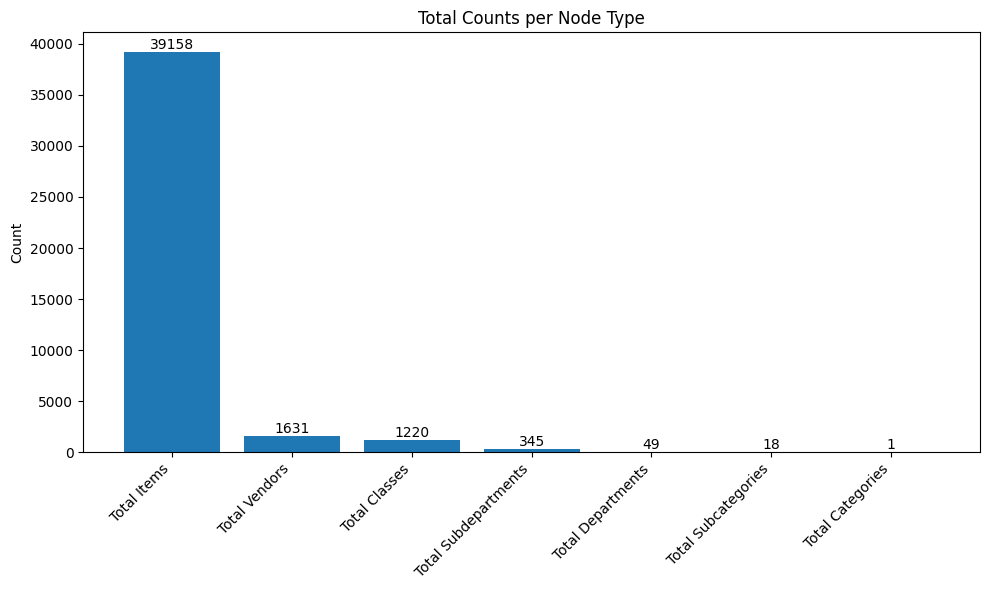

In [4]:
data_path = '/content/drive/MyDrive/Colab Notebooks/CS224W Final Project/Data/raw/item_mh_202411071837.csv'
merchandise_df = pd.read_csv(data_path)

# Calculate basic statistics
stats = {
    'Total Items': merchandise_df ['itmid'].nunique(),
    'Total Vendors': merchandise_df ['vdrid'].nunique(),
    'Total Classes': merchandise_df ['classid'].nunique(),
    'Total Subdepartments': merchandise_df ['subdepartmentid'].nunique(),
    'Total Departments': merchandise_df ['departmentid'].nunique(),
    'Total Subcategories': merchandise_df ['subcategoryid'].nunique(),
    'Total Categories': merchandise_df ['categoryid'].nunique(),
}
def plot_basic_stats(stats):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(stats.keys(), stats.values())
    plt.title("Total Counts per Node Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_basic_stats(stats)


In [5]:
#Item-class distribution
merchandise_df.groupby('classid')['itmid'].nunique().describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
itmid,1220.0,32.096721,106.742307,1.0,5.0,14.0,35.0,3357.0


## KNearestNeighbors

In [6]:
import pandas
import json
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
df = merchandise_df
with open('/content/drive/MyDrive/Colab Notebooks/CS224W Final Project/Data/raw/text_embeddings.json','r') as file:
    embeddings = json.load(file)
missing_labels = [label for label in df['itmdesc'].unique() if label not in embeddings.keys()]
print("Labels without a text embeeding:", len(missing_labels))

Labels without a text embeeding: 0


In [8]:
## One hot encode class names
mlb= MultiLabelBinarizer()

multi_label_df = df.groupby('itmdesc')['classname'].apply(list).reset_index()
one_hot_labels = mlb.fit_transform(multi_label_df['classname'])
encoded_df = pd.DataFrame(one_hot_labels, columns=mlb.classes_, index=multi_label_df['itmdesc'])
encoded_df.head()

,1 GALLON POTS,10 PACK,12 PACK,24 PACK,2LT BOTTLE,4 POTS,6 PACK,ADULT,ADULT INCONTENINCE,AIR FRESHNERS - AEROSOL,...,YOGURT - MULTI,YOGURT - MULTI - GREEK,YOGURT - OTHER,YOGURT - SINGLE SERVE,YOGURT - SINGLE SERVE - GREEK,YOGURT - TUB,YOGURT - TUB - GREEK,YOGURTYS,ZOODLES,ZUCCHINI - GREEN
itmdesc,,,,,,,,,,,,,,,,,,,,,
"FS40M6 6""2 PIECE METAL SCAN HOOK",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OPTION+ ALUMINIUM CANE WITH OFFSET HANDLE ALL TER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PPY HALLOWEEN CARD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"WHOVILLE TREE 3.75""X 13.25"" TRIANGLE",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Whole Prosciutto Bulk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Create features and target matrices
X = np.asarray([embeddings.get(item,np.zeros(256)) for item in encoded_df.index])
y = encoded_df.values
print(X.shape, y.shape)

(29947, 256) (29947, 1061)


In [10]:
# Generate train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=123)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (20962, 256) (20962, 1061)
Test shape: (8985, 256) (8985, 1061)


In [ ]:
knn = KNeighborsClassifier()

# Define a hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan','cosine'],  # Distance metric
}

# Define a scorer
scorer = make_scorer(f1_score, average="micro")

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
# Calculate test F1 Score
y_pred = grid_search.best_estimator_.predict(X_test)
f1_pred = f1_score(y_test,g_pred,average='micro')
print("Test F1 Score:", round(f1_pred,4))